# Python for Machine Learning

### *Session \#6*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Decision Trees

In [1]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ConfusionMatrix, ROCAUC
from yellowbrick.model_selection import ValidationCurve

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df = pd.read_csv("breast_cancer.csv", usecols=range(1, 32))

X = df.drop('diagnosis', 1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

### Warm Ups

*Type the given code into the cell below*

---
**Create a decision tree:** 
```python
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)
```

In [2]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

**Print tree:** 

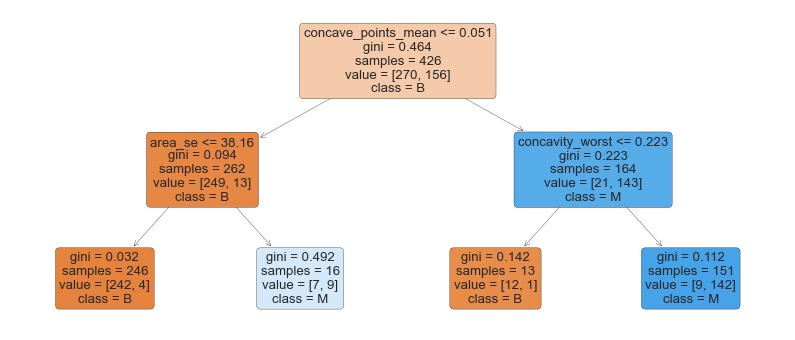

In [3]:
plt.figure(figsize=(14,6))
plot_tree(model, 
          feature_names=X.columns, 
          class_names=model.classes_, 
          filled=True,
          rounded=True)
plt.show()

**Show Gini importance of features:** 

In [4]:
sorted(zip(model.feature_importances_, X.columns))

[(0.0, 'area_mean'),
 (0.0, 'area_worst'),
 (0.0, 'compactness_mean'),
 (0.0, 'compactness_se'),
 (0.0, 'compactness_worst'),
 (0.0, 'concave_points_se'),
 (0.0, 'concave_points_worst'),
 (0.0, 'concavity_mean'),
 (0.0, 'concavity_se'),
 (0.0, 'fractal_dimension_mean'),
 (0.0, 'fractal_dimension_se'),
 (0.0, 'fractal_dimension_worst'),
 (0.0, 'perimeter_mean'),
 (0.0, 'perimeter_se'),
 (0.0, 'perimeter_worst'),
 (0.0, 'radius_mean'),
 (0.0, 'radius_se'),
 (0.0, 'radius_worst'),
 (0.0, 'smoothness_mean'),
 (0.0, 'smoothness_se'),
 (0.0, 'smoothness_worst'),
 (0.0, 'symmetry_mean'),
 (0.0, 'symmetry_se'),
 (0.0, 'symmetry_worst'),
 (0.0, 'texture_mean'),
 (0.0, 'texture_se'),
 (0.0, 'texture_worst'),
 (0.05492311989310962, 'area_se'),
 (0.1093477668050173, 'concavity_worst'),
 (0.835729113301873, 'concave_points_mean')]

### Exercises
---

**1. In the decision tree graphed above, how would the following two cases be classified?**

* concave_points_mean = 0.050
* area_se = 42
* concavity_worst = 0.5


* concave points_mean = 0.092
* area_se = 32
* concavity_worst = 0.6


*Hint: If the top line within each box is true, go left. False, go right.*

In [5]:
# M (Second leaf from left)

# M (Far-right leaf)

**2. What is the Gini impurity of the first cut? The second?**

Gini reminder: Imagine randomly choosing a datapoint, then assign class label with probability according to proportion of classes. What's the chance of misclassification?

<br>
<div style="display: flex;">
    <img src="../images/gini1.png"> 
    <img src="../images/gini2.png">
</div>

In [6]:
# FIRST IMAGE
# ------------------------
# Left side: (1/3)*(2/3) + (2/3)*(1/3) = 0.444
# Right side = (1/4)*(3/4) + (3/4)*(1/4) = 0.375

# SECOND IMAGE
# ------------------------
# Left side: (1/4)*(3/4) + (3/4)*(1/4) = 0.375
# Right side = (0)*(1) + (1)*(0) = 0.0

**3. What is the accuracy score of the decision tree above?**

**Retrain and remove the** `max_depth` **parameter. Compare the score on the training set and test sets. What is happening to the model?**

In [14]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print('')

print(y_test.value_counts())
print('')

model13 = DecisionTreeClassifier()
model13.fit(X_train,y_train)

print(model13.score(X_train, y_train))
print(model13.score(X_test, y_test))

1.0
0.9230769230769231

B    87
M    56
Name: diagnosis, dtype: int64

1.0
0.9440559440559441


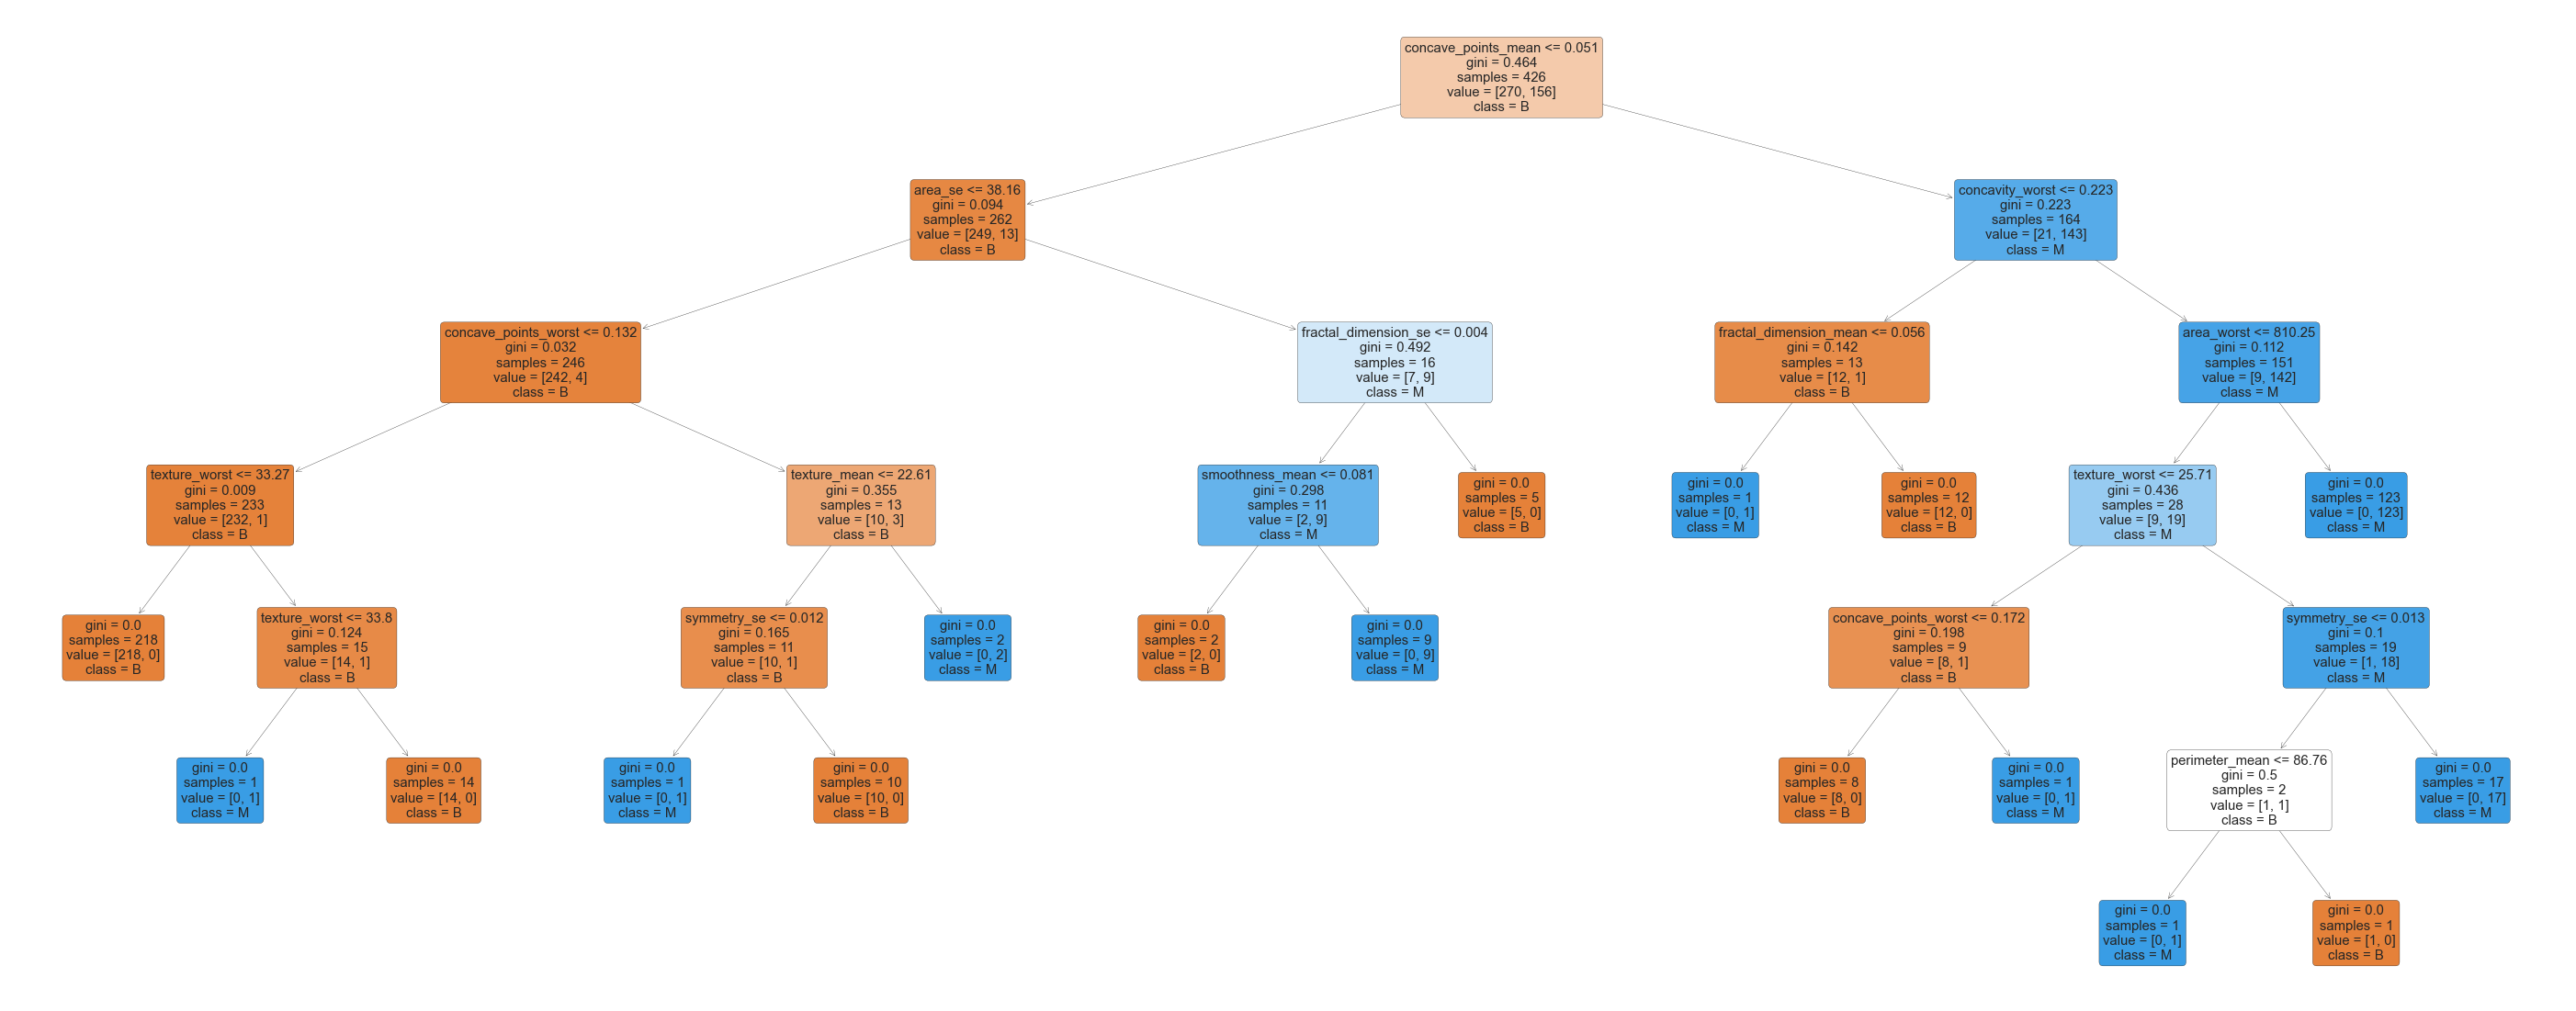

In [13]:
plt.figure(figsize=(50,20))
plot_tree(model13, 
          feature_names=X.columns, 
          class_names=model13.classes_, 
          filled=True,
          rounded=True)
plt.show()

**4. Use a validation curve to find where** `max_depth` **begins to become ineffective.**

Hint: `ValidationCurve()` takes model, then parameter name, then values you want to try.

ValidationCurve(ax=<AxesSubplot:>, model=None, param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]))

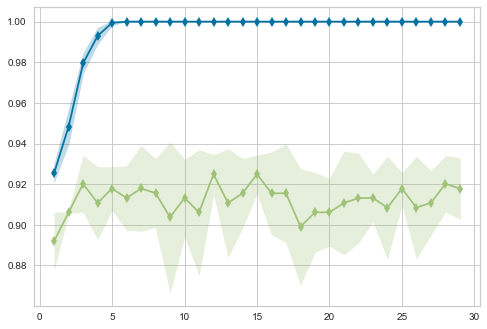

In [38]:
model_vc = ValidationCurve(model, 'max_depth', range(1,30))
model_vc.fit(X_train, y_train)

**5. Retrain the model with** `max_depth` **set to the ideal value you found.**

**Which features were most important to the decision tree?**

In [22]:
model = DecisionTreeClassifier(max_depth=9)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

sorted(zip(model.feature_importances_, X.columns))

0.9300699300699301


[(0.0, 'area_mean'),
 (0.0, 'compactness_mean'),
 (0.0, 'compactness_se'),
 (0.0, 'concave_points_se'),
 (0.0, 'concavity_mean'),
 (0.0, 'concavity_se'),
 (0.0, 'fractal_dimension_mean'),
 (0.0, 'fractal_dimension_worst'),
 (0.0, 'perimeter_se'),
 (0.0, 'perimeter_worst'),
 (0.0, 'radius_mean'),
 (0.0, 'radius_se'),
 (0.0, 'radius_worst'),
 (0.0, 'smoothness_se'),
 (0.0, 'smoothness_worst'),
 (0.0, 'symmetry_mean'),
 (0.0, 'texture_se'),
 (0.004524666366771635, 'symmetry_worst'),
 (0.005056980056980057, 'perimeter_mean'),
 (0.009194509194509195, 'symmetry_se'),
 (0.009335963182117024, 'compactness_worst'),
 (0.014145398760783379, 'texture_mean'),
 (0.015377748164692066, 'concave_points_worst'),
 (0.016550116550116553, 'smoothness_mean'),
 (0.023273601398601396, 'fractal_dimension_se'),
 (0.02383287242558764, 'area_worst'),
 (0.045335851318404306, 'area_se'),
 (0.05326611863550595, 'texture_worst'),
 (0.09026024208966574, 'concavity_worst'),
 (0.6898459318562652, 'concave_points_mean')]

## II. Random Forest

### Warm Ups

*Type the given code into the cell below*

---

**Create a random forest:**

In [27]:
foresti = RandomForestClassifier(n_estimators=100)
foresti.fit(X_train, y_train)

RandomForestClassifier()

**Feature importance:**

In [28]:
sorted(zip(foresti.feature_importances_, X.columns))

[(0.0023693992102109688, 'fractal_dimension_mean'),
 (0.002482114607604011, 'symmetry_mean'),
 (0.0028731991824180367, 'concave_points_se'),
 (0.0031894806126881816, 'smoothness_se'),
 (0.0032787716172305286, 'concavity_se'),
 (0.004293776709123882, 'texture_se'),
 (0.004416504629128725, 'compactness_se'),
 (0.005151357669223406, 'symmetry_se'),
 (0.0052185272901319095, 'fractal_dimension_se'),
 (0.007947915571783926, 'symmetry_worst'),
 (0.008153685742395665, 'fractal_dimension_worst'),
 (0.008689446171224595, 'smoothness_mean'),
 (0.010956777055458385, 'compactness_worst'),
 (0.011298338598197916, 'perimeter_se'),
 (0.011903349225403906, 'texture_mean'),
 (0.013073997223051295, 'smoothness_worst'),
 (0.014929705348233437, 'radius_se'),
 (0.01689444530101438, 'compactness_mean'),
 (0.016905682793238817, 'texture_worst'),
 (0.026842111565615872, 'radius_mean'),
 (0.03584799285721678, 'concavity_worst'),
 (0.04190991925361308, 'area_se'),
 (0.043544083819595465, 'concavity_mean'),
 (0.0

**Access internal decision trees:**

In [29]:
foresti.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1135988821),
 DecisionTreeClassifier(max_features='auto', random_state=938714664),
 DecisionTreeClassifier(max_features='auto', random_state=1162919969),
 DecisionTreeClassifier(max_features='auto', random_state=2042041353),
 DecisionTreeClassifier(max_features='auto', random_state=1539466471),
 DecisionTreeClassifier(max_features='auto', random_state=166835834),
 DecisionTreeClassifier(max_features='auto', random_state=1384518932),
 DecisionTreeClassifier(max_features='auto', random_state=791540263),
 DecisionTreeClassifier(max_features='auto', random_state=1831962867),
 DecisionTreeClassifier(max_features='auto', random_state=2011983083),
 DecisionTreeClassifier(max_features='auto', random_state=1490975697),
 DecisionTreeClassifier(max_features='auto', random_state=1017691965),
 DecisionTreeClassifier(max_features='auto', random_state=880965407),
 DecisionTreeClassifier(max_features='auto', random_state=2030236979),
 DecisionT

**Grid Search:** 

In [31]:
params = {'n_estimators': range(100, 160, 10),
          'max_depth': range(6,12,2)}
grid = GridSearchCV(foresti, params).fit(X, y)
grid.best_params_

{'max_depth': 8, 'n_estimators': 110}

### Exercises
---

**1. Redo the validation curve exercise with your RandomForest classifier.** 

**Do deeper trees cause overfitting?**

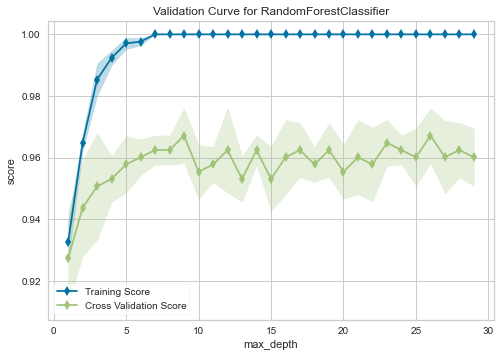

<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [32]:
model_vc = ValidationCurve(RandomForestClassifier(), 'max_depth', range(1,30))
model_vc.fit(X_train, y_train)
model_vc.show()
#Random forests can benefit more from deeper trees

**2. The** `class_weight` **parameter takes a dictionary of classes, and changes how important each class is to the model**

**Try setting it to** `{'B': 10}` **to make the malignant cases 10x as important. Use a** `ConfusionMatrix` **visualizer to see how this affects the type of errors the model makes**

0.972027972027972


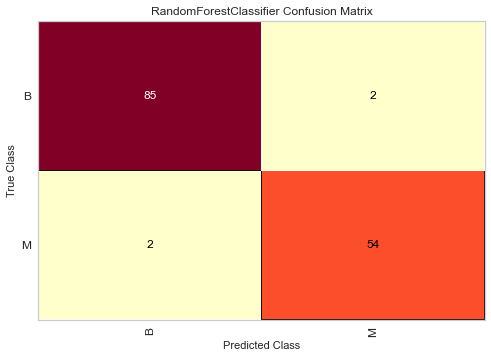

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [50]:
model_cm = ConfusionMatrix(RandomForestClassifier(class_weight={'B': 10}))
model_cm.fit(X_train, y_train)
print(model_cm.score(X_test, y_test))
model_cm.show()

0.9440559440559441


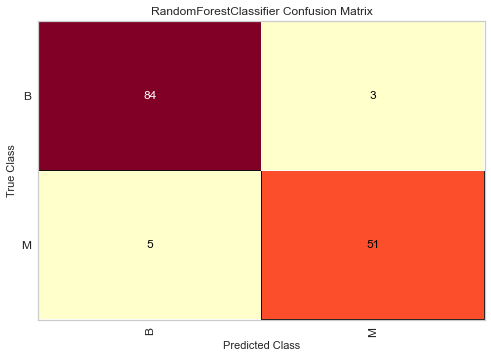

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [52]:
model_cm_nw = ConfusionMatrix(RandomForestClassifier())
model_cm_nw.fit(X_train, y_train)
print(model_cm_nw.score(X_test, y_test))
model_cm_nw.show()

**3. Further parameters to** `RandomForestClassifier` **are:**

    * max_depth -- # of layers in decision trees
    * max_features -- # of columns used at each split
    
**Use grid search to optimize for these hyperparameters**

Note: The more combinations you try, the longer this will run! Start with trying only a few.

In [54]:
forest_gs = RandomForestClassifier(n_estimators=100)
forest_gs.fit(X_train, y_train)

params = {'max_depth': range(10, 40, 4),
          'max_features': range(4, 30, 4)}
grid = GridSearchCV(forest_gs, params).fit(X, y)
#'CV' means GridSearch is doing 'cross validation'
#i.e. it's doing multiple iterations of train_test_split()
grid.best_params_

{'max_depth': 18, 'max_features': 8}

**4. A major benefit of decision-tree and random-forest models is that they perform automatic feature selection.**

**Run the code below to add 10 columns of random data to your dataset. Re-train your model and score it.**

In [60]:
random_df = pd.DataFrame(np.random.randint(0,
                                           100,
                                           size=(len(df), 10)), 
                         columns=[f"random_{i}" for i in range(10)])

big_df = pd.concat([df, random_df], axis=1)
X_big = big_df.drop('diagnosis', 1)
y_big = big_df['diagnosis']
tts_big = train_test_split(X_big, y_big, random_state=100)
tts_big[0]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,random_0,random_1,random_2,random_3,random_4,random_5,random_6,random_7,random_8,random_9
111,12.630,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.06021,0.1735,0.07070,...,3,52,89,61,33,52,65,31,91,25
523,13.710,18.68,88.73,571.0,0.09916,0.10700,0.053850,0.03783,0.1714,0.06843,...,91,94,96,76,30,10,20,25,51,72
547,10.260,16.58,65.85,320.8,0.08877,0.08066,0.043580,0.02438,0.1669,0.06714,...,98,91,10,1,60,99,31,5,7,97
41,10.950,21.35,71.90,371.1,0.12270,0.12180,0.104400,0.05669,0.1895,0.06870,...,17,78,31,36,43,90,35,59,63,63
91,15.370,22.76,100.20,728.2,0.09200,0.10360,0.112200,0.07483,0.1717,0.06097,...,29,80,0,38,66,33,44,55,97,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,13.460,18.75,87.44,551.1,0.10750,0.11380,0.042010,0.03152,0.1723,0.06317,...,55,74,11,93,59,76,97,10,74,43
53,18.220,18.70,120.30,1033.0,0.11480,0.14850,0.177200,0.10600,0.2092,0.06310,...,53,48,48,60,79,19,76,83,94,64
350,11.660,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,0.05731,...,37,12,4,97,61,27,5,4,6,38
79,12.860,18.00,83.19,506.3,0.09934,0.09546,0.038890,0.02315,0.1718,0.05997,...,57,75,18,80,54,39,43,50,56,30


In [62]:
forest_big = RandomForestClassifier()
forest_big.fit(tts_big[0], tts_big[2])
print(forest_big.score(tts_big[1], tts_big[3]))
sorted(zip(forest_big.feature_importances_, X_big.columns))

0.958041958041958


[(0.0016088002359347623, 'random_3'),
 (0.0019585442750502265, 'random_4'),
 (0.002049107568176398, 'random_2'),
 (0.0021167502325344844, 'random_0'),
 (0.0021169712683202536, 'random_1'),
 (0.002171352913739595, 'smoothness_se'),
 (0.0024409685384450775, 'random_8'),
 (0.0026510782841931506, 'random_7'),
 (0.002749153504638056, 'random_5'),
 (0.003020976980473935, 'fractal_dimension_mean'),
 (0.0032946290635004287, 'random_6'),
 (0.003787207242670272, 'concave_points_se'),
 (0.003916239895938784, 'random_9'),
 (0.004009487683809178, 'symmetry_se'),
 (0.004152608877856781, 'fractal_dimension_se'),
 (0.00474812904164798, 'symmetry_mean'),
 (0.004805188168552557, 'compactness_se'),
 (0.005856278516920527, 'texture_se'),
 (0.006187357078811923, 'symmetry_worst'),
 (0.006210708310982253, 'fractal_dimension_worst'),
 (0.007477037036132352, 'concavity_se'),
 (0.007814867420992433, 'smoothness_mean'),
 (0.011521287157986443, 'texture_mean'),
 (0.01431596819753616, 'texture_worst'),
 (0.014774

## III. Final Practice for Home: Start to Finish

### Exercises
---

**1. Let's bring it all together! Here you will apply all the individual skills you've learned to a raw dataset.** 

**You will need to:** 

* Explore the data
* Select an appropriate model
* Split the data into X, y and train/test
* Handle null values, if present
* Do feature engineering
* Use appropriate evaluation methods
* Optimize hyperparameters

In [188]:
# "target" column is what we want to predict
# 0 = Bad Car, 3 = Very Good Car

cars = pd.read_csv("cars.csv")

In [187]:
# "price" column is what we want to predict

diamonds = pd.read_csv("diamonds.csv")